In [1]:
import matplotlib.pyplot as plt

In [2]:
import torch

In [3]:
import numpy as np
import pandas as pd
from rdkit import Chem

import openpyxl
import os
from pathlib import Path

In [4]:
%matplotlib inline

In [5]:
TOP = Path.cwd().as_posix().replace('notebooks','')
raw_dir = Path(TOP) / 'data'/'raw'
interim_dir = Path(TOP) / 'data'/'interim'
external_dir = Path(TOP) / 'data'/'external'
figures_dir = Path(TOP) / 'reports'/'figures/'
processed_dir = Path(TOP) / 'data'/'processed'


In [6]:
df = pd.read_csv(interim_dir/'rax_pairs_200125.csv', index_col = [0])
df

,Target,Analogue,Label,analogue_smi,target_smi,analogue_mol,target_mol,fps_target,fps_analogue,Tanimoto
1,DTXSID5023378,DTXSID0044496,1,CCCCCC1CCCC(=O)O1,NCC(O)C1=CC=C(O)C(O)=C1,<rdkit.Chem.rdchem.Mol object at 0x7b9df2c882e0>,<rdkit.Chem.rdchem.Mol object at 0x7b9de85e1310>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.031746
2,DTXSID5023378,DTXSID4029301,1,Cl[SiH](Cl)Cl,NCC(O)C1=CC=C(O)C(O)=C1,<rdkit.Chem.rdchem.Mol object at 0x7b9df2c884a0>,<rdkit.Chem.rdchem.Mol object at 0x7b9de85e1380>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.000000
3,DTXSID5023378,DTXSID8026488,1,CC1(C)C2CCC(C2)C1=C,NCC(O)C1=CC=C(O)C(O)=C1,<rdkit.Chem.rdchem.Mol object at 0x7b9df2c88200>,<rdkit.Chem.rdchem.Mol object at 0x7b9de85e13f0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.019231
4,DTXSID5023378,DTXSID0029719,1,CCCCC(CC)COC(=O)CS[Sn](CCCC)(CCCC)SCC(=O)OCC(C...,NCC(O)C1=CC=C(O)C(O)=C1,<rdkit.Chem.rdchem.Mol object at 0x7b9df2c88120>,<rdkit.Chem.rdchem.Mol object at 0x7b9de85e1460>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.057971
5,DTXSID5023378,DTXSID6047105,1,COC1=CC(C)=CC=C1O,NCC(O)C1=CC=C(O)C(O)=C1,<rdkit.Chem.rdchem.Mol object at 0x7b9df2c88580>,<rdkit.Chem.rdchem.Mol object at 0x7b9de85e14d0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.170213
...,...,...,...,...,...,...,...,...,...,...
480938,DTXSID00391682,DTXSID6025804,1,CCCCCCC=C,CCC(C)(C)C1=CC(C)=C(O)C(C)=C1,<rdkit.Chem.rdchem.Mol object at 0x7b9de85e10e0>,<rdkit.Chem.rdchem.Mol object at 0x7b9de6ee3c30>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.095238
480939,DTXSID00391682,DTXSID7025631,1,CC1=CC=CC(=C1N)[N+]([O-])=O,CCC(C)(C)C1=CC(C)=C(O)C(C)=C1,<rdkit.Chem.rdchem.Mol object at 0x7b9de85e1150>,<rdkit.Chem.rdchem.Mol object at 0x7b9de6ee3ca0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.102041
481633,DTXSID3020205,DTXSID6025804,1,CCCCCCC=C,CCCCOC(=O)C1=C(C=CC=C1)C(=O)OCC1=CC=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x7b9de85e11c0>,<rdkit.Chem.rdchem.Mol object at 0x7b9de6ee3d10>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.101695
481634,DTXSID3020205,DTXSID7025631,1,CC1=CC=CC(=C1N)[N+]([O-])=O,CCCCOC(=O)C1=C(C=CC=C1)C(=O)OCC1=CC=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x7b9de85e1230>,<rdkit.Chem.rdchem.Mol object at 0x7b9de6ee3d80>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.106061


In [7]:
final_df = (df.reset_index()
 .assign(pair = lambda df: df.apply(lambda row: tuple(sorted([row["Target"], row["Analogue"]])), axis=1)
        )
.drop_duplicates(subset=["pair"]).drop(columns=["pair"])
)

In [8]:
final_df.shape

(213531, 11)

In [9]:
from rdkit.Chem import rdFingerprintGenerator

In [10]:
mfpgen = rdFingerprintGenerator.GetMorganGenerator(radius=3,fpSize=1024)

In [11]:
final_df['Label'].value_counts()

Label
1    210372
0      3159
Name: count, dtype: int64

<Axes: >

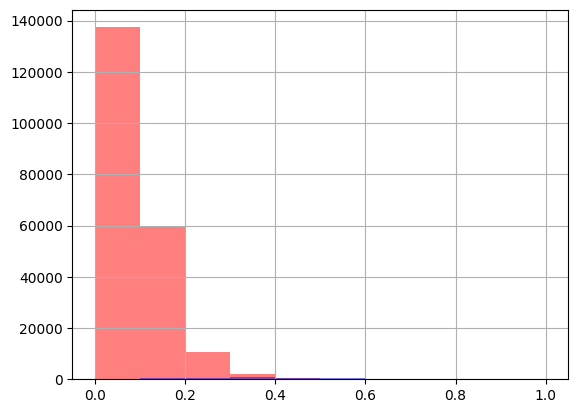

In [12]:
final_df[final_df['Label']==1]['Tanimoto'].hist(color = 'r', alpha = 0.5)
final_df[final_df['Label']==0]['Tanimoto'].hist(color = 'b', alpha = 0.5)

<Axes: >

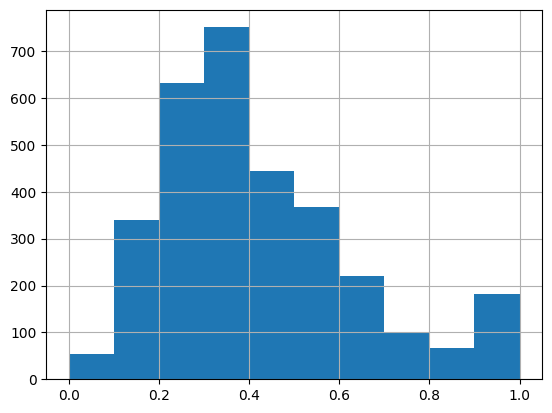

In [13]:
final_df[final_df['Label']==0]['Tanimoto'].hist()

In [14]:
similar_pairs = final_df[final_df['Label'] == 0]
dissimilar_pairs = final_df[final_df['Label'] == 1]

# Step 2: Downsample dissimilar pairs
downsampled_dissimilar_pairs = dissimilar_pairs.sample(n=len(similar_pairs), replace=False)

# Step 3: Combine balanced pairs
balanced_df = pd.concat([similar_pairs, downsampled_dissimilar_pairs])

# Step 4: Shuffle the dataset
balanced_df = balanced_df.sample(frac=1, random_state=42)

In [15]:
balanced_df['Label'].value_counts()

Label
1    3159
0    3159
Name: count, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
#from kennard_stone import train_test_split
#from torch_geometric.loader import DataLoader
#from torch.utils.data import Dataset


In [17]:
balanced_df.columns

Index(['index', 'Target', 'Analogue', 'Label', 'analogue_smi', 'target_smi',
       'analogue_mol', 'target_mol', 'fps_target', 'fps_analogue', 'Tanimoto'],
      dtype='object')

<Axes: >

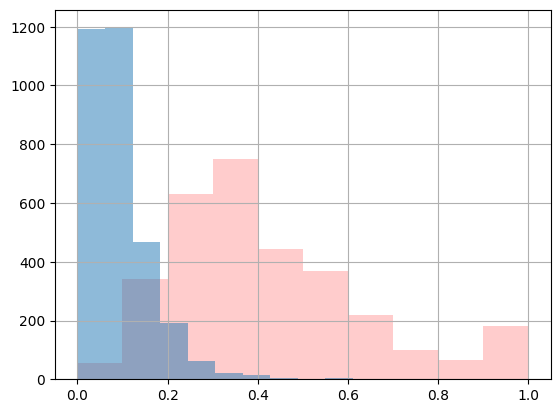

In [18]:
balanced_df[balanced_df['Label']==0].Tanimoto.hist(color = 'r', alpha = 0.2)
balanced_df[balanced_df['Label']==1].Tanimoto.hist(alpha = 0.5)

In [19]:
balanced_df.columns

Index(['index', 'Target', 'Analogue', 'Label', 'analogue_smi', 'target_smi',
       'analogue_mol', 'target_mol', 'fps_target', 'fps_analogue', 'Tanimoto'],
      dtype='object')

In [23]:
balanced_df['analogue_mol'] = [Chem.MolFromSmiles(e) for e in balanced_df['analogue_smi']]
balanced_df['target_mol'] = [Chem.MolFromSmiles(e) for e in balanced_df['target_smi']]

In [24]:
balanced_df = (balanced_df
 .assign(fps_target = lambda df: df.apply(lambda row: mfpgen.GetFingerprintAsNumPy(row['target_mol']), axis =1)
        )
  .assign(fps_analogue = lambda df: df.apply(lambda row: mfpgen.GetFingerprintAsNumPy(row['analogue_mol']), axis =1)
         )
)

In [22]:
balanced_df.to_csv(interim_dir/'balanced_df_icf_070225.csv')

In [22]:
balanced_df = pd.read_csv(interim_dir/'balanced_df_icf_070225.csv', index_col = [0])

In [25]:
balanced_df.head()

,index,Target,Analogue,Label,analogue_smi,target_smi,analogue_mol,target_mol,fps_target,fps_analogue,Tanimoto
183926,302106,DTXSID6022977,DTXSID8026775,1,OC(=O)CCS,OC(=O)CN(CCN(CC(O)=O)CC(O)=O)CC(O)=O,<rdkit.Chem.rdchem.Mol object at 0x7b0fe2fef5a0>,<rdkit.Chem.rdchem.Mol object at 0x7b0fe187c820>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.250000
28334,33987,DTXSID4039233,DTXSID9026132,1,CN1C=NC2=C1C(=O)NC(=O)N2C,CC(C)CC(=O)OCC=C,<rdkit.Chem.rdchem.Mol object at 0x7b0fe2feff40>,<rdkit.Chem.rdchem.Mol object at 0x7b0fe187c890>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.052632
47880,57627,DTXSID50202931,DTXSID1064663,0,CCCC(=O)OCCCC1=CC=CC=C1,CC(C)CC(=O)OCCCC1=CC=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x7b0fe2fefed0>,<rdkit.Chem.rdchem.Mol object at 0x7b0fe187c900>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, ...",0.632653
150974,220926,DTXSID0020529,DTXSID4024012,1,BrC1=CC=C(Br)C=C1,CC1=C(C=C(C=C1)[N+]([O-])=O)[N+]([O-])=O,<rdkit.Chem.rdchem.Mol object at 0x7b0fe2fefe60>,<rdkit.Chem.rdchem.Mol object at 0x7b0fe187c970>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.085714
183544,300826,DTXSID7024320,DTXSID1026089,0,ClC1=CC(Cl)=C(Cl)C(Cl)=C1,ClC1=CC(Cl)=C(Cl)C=C1Cl,<rdkit.Chem.rdchem.Mol object at 0x7b0fe2fefdf0>,<rdkit.Chem.rdchem.Mol object at 0x7b0fe187c9e0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.300000


In [26]:
X_train, X_test, y_train, y_test  = train_test_split(balanced_df[['Target', 'Analogue','target_smi', 'analogue_smi', 'fps_target', 'fps_analogue', 'Label','Tanimoto', ]], balanced_df['Label'], stratify = balanced_df['Label'], random_state = 42,test_size=0.2)

In [27]:
X_train

,Target,Analogue,target_smi,analogue_smi,fps_target,fps_analogue,Label,Tanimoto
62635,DTXSID6047604,DTXSID20202963,CCCC(=O)OCCC1=CC=CC=C1,CCCCCCC(=O)OCC1=CC=CC=C1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0.392857
189408,DTXSID20194995,DTXSID20215058,CCCCCCCCCC(=O)OCC1=CC=CC=C1,CCCCCCCCC(=O)OCC1=CC=CC=C1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,1.000000
103061,DTXSID00859570,DTXSID5059329,OC1=CC2=C(CC(OC(=O)C3=CC(O)=C(O)C(O)=C3)C(O2)C...,COCCOC(=O)CCCCC(=O)OCCOC,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, ...",1,0.050633
206340,Pubchem_102283665,DTXSID1064663,CCCCCCCCCC(=O)OCCCC1=CC=CC=C1,CCCC(=O)OCCCC1=CC=CC=C1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, ...",0,0.692308
8509,DTXSID2022333,DTXSID5042299,CCC(C)C1=CC=CC=C1,CC(C)C1=CC=C(O)C=C1,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,0.194444
...,...,...,...,...,...,...,...,...
13805,DTXSID0029711,DTXSID5026413,Cl[Si](Cl)(Cl)Cl,C[SiH](Cl)Cl,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0.111111
45523,DTXSID60206647,Pubchem_102283661,CCCCCCCCC(=O)OCCC1=CC=CC=C1,CCCCCCCCC(=O)OCCCC1=CC=CC=C1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, ...",0,0.740741
202249,DTXSID7021520,DTXSID00885379,CCCCOCCOCCOCCO,CCC(C)CNCC(C)CC,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,0.078947
151385,DTXSID7027596,DTXSID90884871,COCCCN,CC1=CC=C(C=C1)S(O)(=O)=O,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,0.027778


In [28]:
# Now, split the remaining 20% into 10% validation and 10% test
val_data, test_data = train_test_split(X_test, stratify =X_test['Label'], test_size=0.5, random_state=42)

In [29]:
y_train.value_counts(normalize = False)

Label
0    2527
1    2527
Name: count, dtype: int64

In [30]:
y_test.value_counts(normalize = False)

Label
0    632
1    632
Name: count, dtype: int64

In [31]:
#test_data

In [32]:
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
#import torch
import torch.optim as optim

In [33]:
X_train['fps_target'].values

array([array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
       array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
       array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), ...,
       array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
       array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
       array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)], dtype=object)

In [34]:
class ChemicalPairsDataset(Dataset):
    def __init__(self, df):
        """
        fp1: target column in df of numpy representation of Morgan fp
        fp2: analogue column in df of numpy representation of Morgan fp
        labels: List of 0 (similar) or 1 (dissimilar) for each pair
        """
        self.df = df
    
    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        fp1 = torch.tensor(row['fps_target'], dtype=torch.float32)
        fp2 = torch.tensor(row['fps_analogue'], dtype=torch.float32)
        label = torch.tensor(row['Label'], dtype=torch.float32)  # Ensure label is a tensor
        identifier = (row['Target'], row['Analogue'])  # Tuple remains as is (not a tensor)

        return fp1, fp2, label, identifier
        
        


In [35]:
# Define the model
class ContrastiveNetwork(nn.Module):
    def __init__(self, input_dim, embedding_dim):
        super(ContrastiveNetwork, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, embedding_dim)
        )

    def forward(self, x):
        return self.encoder(x)

# Contrastive loss function
class ContrastiveLoss(nn.Module):
    def __init__(self, margin=1.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, embedding1, embedding2, label):
        distance = torch.nn.functional.pairwise_distance(embedding1, embedding2)
        loss = torch.mean((1 - label) * torch.pow(distance, 2) +
                                      (label) * torch.pow(torch.clamp(self.margin - distance, min=0.0), 2))

        return loss

In [36]:
def compute_accuracy(model, dataloader, margin=1.0):
    model.eval()
    correct = 0
    total = 0
    all_predictions = []
    all_labels = []
    all_identifiers = []

    with torch.no_grad():
        for fp1, fp2, label, identifier in dataloader:
            emb1 = model(fp1)
            emb2 = model(fp2)
            distances = torch.nn.functional.pairwise_distance(emb1, emb2)
            

            # Use the margin as the decision boundary
            predictions = (distances > margin).long()  # Dissimilar if distance > margin
            correct += (predictions == label).sum().item()
            total += label.size(0)
            all_predictions.extend(predictions.cpu().numpy())
            all_labels.extend(label.cpu().numpy())
            all_identifiers.extend(identifier) 
            

    accuracy = correct / total
    print(f"Accuracy: {accuracy:.4f}")
    return accuracy, all_predictions, all_labels, all_identifiers

In [37]:
input_dim = 1024
embedding_dim = 128
model = ContrastiveNetwork(input_dim, embedding_dim)
criterion = ContrastiveLoss(margin=1.0)
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [41]:
#from sklearn.model_selection import StratifiedKFold

In [40]:
k_folds = 5  
patience = 5  # Number of epochs to wait for improvement

skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)
fold_results = []

# Convert labels to tensor to prevent re-processing inside __getitem__
X_train['Label'] = X_train['Label'].astype(float)

for fold, (train_idx, test_idx) in enumerate(skf.split(X_train, X_train['Label'])):
    print(f"\nFOLD {fold + 1}/{k_folds}")

    # Create dataset instances using indexed subsets
    train_dataset = ChemicalPairsDataset(X_train.iloc[train_idx].reset_index(drop=True))
    test_dataset = ChemicalPairsDataset(X_train.iloc[test_idx].reset_index(drop=True))

    # Create DataLoaders
    train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
    test_dataloader = DataLoader(test_dataset, batch_size=8, shuffle=False)

    # Reinitialize model and optimizer for each fold
    model = ContrastiveNetwork(input_dim, embedding_dim) # Replace with your PyTorch Geometric model
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = ContrastiveLoss(margin=1.0) # Adjust loss function as needed

    best_loss = float('inf')
    counter = 0  # Patience counter

    for epoch in range(50):
        model.train()
        total_loss = 0.0

        for fp1, fp2, label, identifier in train_dataloader:
            optimizer.zero_grad()
            emb1 = model(fp1)
            emb2 = model(fp2)
            loss = criterion(emb1, emb2, label.unsqueeze(1))  # Ensure label shape matches output
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        # Compute loss and accuracy for training and test sets
        train_accuracy = compute_accuracy(model, train_dataloader)[0]
        test_accuracy = compute_accuracy(model, test_dataloader)[0]
        
        avg_loss = total_loss / len(train_dataloader)
        print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}, "
              f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

        # Early Stopping
        if avg_loss < best_loss:
            best_loss = avg_loss
            counter = 0
            best_model_state = model.state_dict()
        else:
            counter += 1
            if counter >= patience:
                print(f"Early stopping triggered at epoch {epoch+1}")
                break  

    # Restore best model and evaluate final performance
    model.load_state_dict(best_model_state)
    final_test_accuracy = compute_accuracy(model, test_dataloader)[0]
    fold_results.append(final_test_accuracy)

# Print average accuracy across folds
avg_accuracy = sum(fold_results) / len(fold_results)
print(f"\nCross-Validation Complete. Average Test Accuracy: {avg_accuracy:.4f}")


FOLD 1/5
Accuracy: 0.5036
Accuracy: 0.5005
Epoch 1, Loss: 0.2707, Train Accuracy: 0.5036, Test Accuracy: 0.5005
Accuracy: 0.5023
Accuracy: 0.5015
Epoch 2, Loss: 0.2670, Train Accuracy: 0.5023, Test Accuracy: 0.5015
Accuracy: 0.5021
Accuracy: 0.5025
Epoch 3, Loss: 0.2667, Train Accuracy: 0.5021, Test Accuracy: 0.5025
Accuracy: 0.5063
Accuracy: 0.5143
Epoch 4, Loss: 0.2660, Train Accuracy: 0.5063, Test Accuracy: 0.5143
Accuracy: 0.5031
Accuracy: 0.5045
Epoch 5, Loss: 0.2651, Train Accuracy: 0.5031, Test Accuracy: 0.5045
Accuracy: 0.4999
Accuracy: 0.5005
Epoch 6, Loss: 0.2648, Train Accuracy: 0.4999, Test Accuracy: 0.5005
Accuracy: 0.5038
Accuracy: 0.5035
Epoch 7, Loss: 0.2654, Train Accuracy: 0.5038, Test Accuracy: 0.5035
Accuracy: 0.5014
Accuracy: 0.5015
Epoch 8, Loss: 0.2641, Train Accuracy: 0.5014, Test Accuracy: 0.5015
Accuracy: 0.5001
Accuracy: 0.5005
Epoch 9, Loss: 0.2632, Train Accuracy: 0.5001, Test Accuracy: 0.5005
Accuracy: 0.4999
Accuracy: 0.5005
Epoch 10, Loss: 0.2637, Train

In [38]:
train_dataset = ChemicalPairsDataset(X_train)
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)

test_dataset = ChemicalPairsDataset(test_data)
test_dataloader = DataLoader(test_dataset, batch_size=8, shuffle=False)

val_dataset = ChemicalPairsDataset(val_data)
val_dataloader = DataLoader(val_dataset, batch_size=8, shuffle=False)


In [39]:
import copy

In [40]:

patience = 5  # Number of epochs to wait for improvement
best_loss = float('inf')
counter = 0  # Counts epochs without improvement
best_model_state = None  # Placeholder for best model state

for epoch in range(50):
    model.train()  # Set model to training mode
    total_loss = 0.0

    for fp1, fp2, label, identifier in train_dataloader:
        optimizer.zero_grad()
        emb1 = model(fp1)
        emb2 = model(fp2)
        loss = criterion(emb1, emb2, label.float())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    # Compute validation loss
    val_loss = 0.0
    model.eval()
    with torch.no_grad():
        for fp1, fp2, label, _ in val_dataloader:
            emb1 = model(fp1)
            emb2 = model(fp2)
            loss = criterion(emb1, emb2, label.float())
            val_loss += loss.item()
    
    val_loss /= len(val_dataloader)
    avg_loss = total_loss / len(train_dataloader)

    # Compute accuracy for training and validation sets
    train_accuracy = compute_accuracy(model, train_dataloader)[0]
    val_accuracy = compute_accuracy(model, val_dataloader)[0]

    print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}, Val Loss: {val_loss:.4f}, "
          f"Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}")


    # Early Stopping Logic
    if val_loss < best_loss:
        best_loss = val_loss
        counter = 0  # Reset patience counter
        best_model_state = copy.deepcopy(model.state_dict()) # Save best model
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            break  # Stop training

# Load best model state
if best_model_state:
    model.load_state_dict(best_model_state)
print("Training complete. Best model restored.")


Accuracy: 0.8987
Accuracy: 0.8877
Epoch 1, Loss: 0.0568, Val Loss: 0.0294, Train Acc: 0.8987, Val Acc: 0.8877
Accuracy: 0.9656
Accuracy: 0.9446
Epoch 2, Loss: 0.0191, Val Loss: 0.0208, Train Acc: 0.9656, Val Acc: 0.9446
Accuracy: 0.9677
Accuracy: 0.9446
Epoch 3, Loss: 0.0124, Val Loss: 0.0194, Train Acc: 0.9677, Val Acc: 0.9446
Accuracy: 0.9624
Accuracy: 0.9399
Epoch 4, Loss: 0.0117, Val Loss: 0.0175, Train Acc: 0.9624, Val Acc: 0.9399
Accuracy: 0.9676
Accuracy: 0.9509
Epoch 5, Loss: 0.0107, Val Loss: 0.0179, Train Acc: 0.9676, Val Acc: 0.9509
Accuracy: 0.9695
Accuracy: 0.9415
Epoch 6, Loss: 0.0096, Val Loss: 0.0215, Train Acc: 0.9695, Val Acc: 0.9415
Accuracy: 0.9648
Accuracy: 0.9272
Epoch 7, Loss: 0.0086, Val Loss: 0.0185, Train Acc: 0.9648, Val Acc: 0.9272
Accuracy: 0.9798
Accuracy: 0.9668
Epoch 8, Loss: 0.0075, Val Loss: 0.0170, Train Acc: 0.9798, Val Acc: 0.9668
Accuracy: 0.9780
Accuracy: 0.9478
Epoch 9, Loss: 0.0077, Val Loss: 0.0177, Train Acc: 0.9780, Val Acc: 0.9478
Accuracy: 

In [41]:
def visualize_distances_consistent(model, dataloader, margin=1.0,filename='siamese_mgrn'):
    model.eval()
    similar_distances = []
    dissimilar_distances = []
    
    with torch.no_grad():
        for fp1, fp2, label, identifier in dataloader:
            emb1 = model(fp1)
            emb2 = model(fp2)
            distances = torch.nn.functional.pairwise_distance(emb1, emb2)
            
            # Separate distances by labels
            label = label.cpu().numpy()
            similar_distances.extend(distances[label == 0].cpu().numpy())
            dissimilar_distances.extend(distances[label == 1].cpu().numpy())
    
    # Plot histograms
    plt.figure(figsize=(10, 6))
    plt.hist(similar_distances, bins=30, alpha=0.6, color='blue', label='Similar Pairs (label=0)')
    plt.hist(dissimilar_distances, bins=30, alpha=0.6, color='red', label='Dissimilar Pairs (label=1)')
    plt.axvline(x=margin, color='black', linestyle='--', label='Training Margin')
    plt.xlabel('Pairwise Distance')
    plt.ylabel('Frequency')
    plt.title('Distribution of Pairwise Distances (Aligned with Training)')
    plt.legend()
    # Save the plot if a path is provided
    if filename:
        plt.savefig(filename, dpi=300)
    
    plt.show()

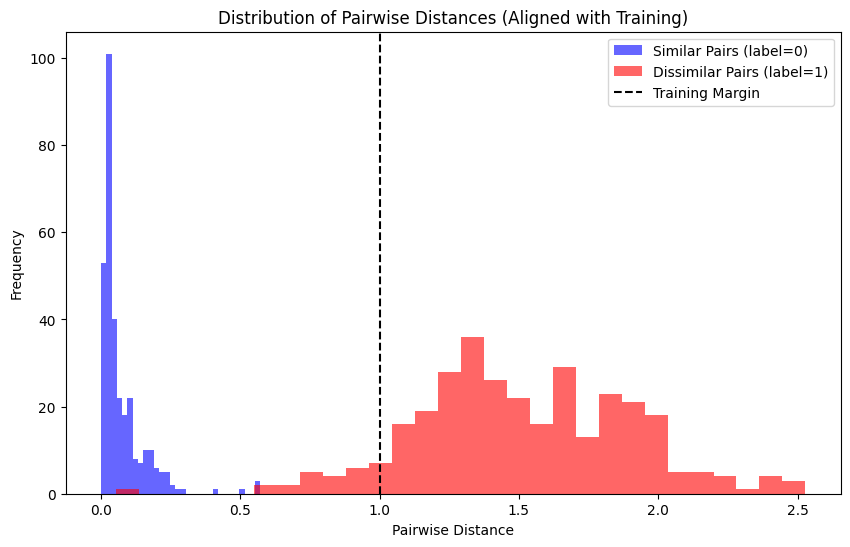

In [42]:
#| fig-label: fig-distances
visualize_distances_consistent(model, test_dataloader, margin=1.0)


In [43]:
res = compute_accuracy(model,  test_dataloader, margin=1.0)

Accuracy: 0.9668


In [44]:
from sklearn.metrics import balanced_accuracy_score,accuracy_score,f1_score, confusion_matrix, recall_score, precision_score, classification_report

In [45]:
confusion_matrix(res[2], res[1])

array([[316,   0],
       [ 21, 295]])

In [46]:
balanced_accuracy_score(res[2], res[1])

0.9667721518987342

In [47]:
len(res[2])

632

In [48]:
print(classification_report(res[2], res[1]))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       316
         1.0       1.00      0.93      0.97       316

    accuracy                           0.97       632
   macro avg       0.97      0.97      0.97       632
weighted avg       0.97      0.97      0.97       632



In [49]:
def extract_pairwise_embeddings(model, dataloader):
    """
    Extract embeddings for pairs of substances, calculate distances, 
    and save labels and identifiers for analysis.
    """
    model.eval()
    embeddings_fp1 = []
    embeddings_fp2 = []
    distances = []
    labels = []
    identifiers = []  # To trace back the actual chemical pairs

    with torch.no_grad():
        for fp1, fp2, label, identifier in dataloader:
            # Compute embeddings for both substances in the pair
            emb1 = model(fp1)
            emb2 = model(fp2)
            
            # Compute the pairwise distance between embeddings
            distance = torch.nn.functional.pairwise_distance(emb1, emb2)
            
            # Save embeddings, distances, labels, and identifiers
            embeddings_fp1.append(emb1.cpu().numpy())
            embeddings_fp2.append(emb2.cpu().numpy())
            distances.append(distance.cpu().numpy())
            labels.append(label.cpu().numpy())
            identifiers.extend(identifier)

    # Concatenate lists into arrays for easier handling
    embeddings_fp1 = np.vstack(embeddings_fp1)
    embeddings_fp2 = np.vstack(embeddings_fp2)
    distances = np.concatenate(distances)
    labels = np.concatenate(labels)

    return embeddings_fp1, embeddings_fp2, distances, labels, identifiers

In [50]:
# Extract embeddings for the test set
embeddings_fp1, embeddings_fp2, distances, labels, identifiers = extract_pairwise_embeddings(model, test_dataloader)



In [51]:
test_data.shape

(632, 8)

In [52]:
len(distances)

632

In [53]:
test_data1 = (test_data
 .assign(target_emb = lambda x: [ embeddings_fp1[i] for i in range(len(test_data))])
 .assign(analogue_emd =  lambda x: [ embeddings_fp2[i] for i in range(len(test_data))])
)

In [54]:
#test_data1

In [55]:
test_data1 = (test_data1
 .assign(embed_dist = distances)
 .assign(prediction = lambda df: df.apply(lambda x: 1 if x['embed_dist'] > 1 else 0, axis = 1)) # Dissimilar if distance > mar
)

In [56]:
confusion_matrix(test_data1['Label'], test_data1['prediction'])

array([[316,   0],
       [ 21, 295]])

In [57]:
print(classification_report(test_data1['Label'], test_data1['prediction']))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       316
           1       1.00      0.93      0.97       316

    accuracy                           0.97       632
   macro avg       0.97      0.97      0.97       632
weighted avg       0.97      0.97      0.97       632



In [58]:
def cosine_sim(vec1, vec2):
    return cosine_similarity([vec1], [vec2])[0][0]

In [59]:
def normalize_cosine_similarity(cos_sim):
    return (cos_sim + 1) / 2 

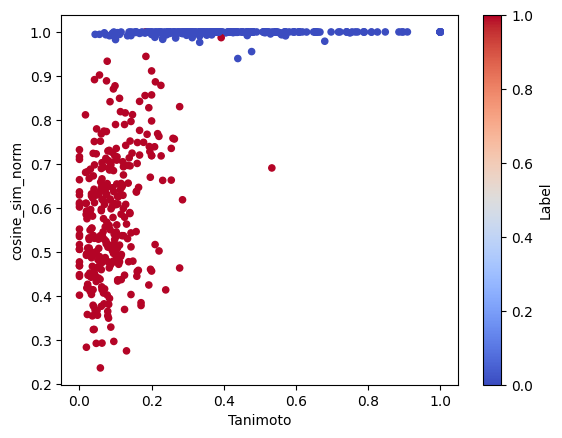

In [60]:
from sklearn.metrics.pairwise import cosine_similarity
ax = (test_data1
 .assign(cosine_sim = lambda x:x.apply(lambda row: cosine_sim(row['target_emb'], row['analogue_emd']), axis =1))
 .assign(cosine_sim_norm = lambda x:x.apply(lambda row: normalize_cosine_similarity(row['cosine_sim']), axis =1))
 .plot(kind = 'scatter', x = 'Tanimoto', y = 'cosine_sim_norm', c = 'Label', cmap = 'coolwarm')
)
fig = ax.get_figure()

# Save the figure
fig.savefig('cosine_tanimoto_scatter.png', dpi=300)
 

In [61]:
test_data1 = (test_data1
 .assign(cosine_sim = lambda x:x.apply(lambda row: cosine_sim(row['target_emb'], row['analogue_emd']), axis =1))
 .assign(cosine_sim_norm = lambda x:x.apply(lambda row: normalize_cosine_similarity(row['cosine_sim']), axis =1))
)

In [62]:
test_data1.columns

Index(['Target', 'Analogue', 'target_smi', 'analogue_smi', 'fps_target',
       'fps_analogue', 'Label', 'Tanimoto', 'target_emb', 'analogue_emd',
       'embed_dist', 'prediction', 'cosine_sim', 'cosine_sim_norm'],
      dtype='object')

In [63]:
test_data1[['Target', 'Analogue','Tanimoto','cosine_sim_norm']]

,Target,Analogue,Tanimoto,cosine_sim_norm
11473,DTXSID5024346,DTXSID8021939,0.000000,0.551806
208842,Pubchem_102283661,DTXSID20215058,0.596491,0.999989
205943,DTXSID9029225,DTXSID7029742,0.437500,0.999942
45473,DTXSID60206647,DTXSID6065052,0.431034,0.999932
77000,DTXSID7044506,DTXSID80210807,0.480769,0.999963
...,...,...,...,...
43351,DTXSID5040700,DTXSID4021218,0.074627,0.773573
147045,DTXSID6041551,DTXSID501031358,0.033898,0.553559
189114,DTXSID7026946,DTXSID00885379,0.063830,0.476569
137482,DTXSID5025609,DTXSID6029624,0.250000,0.999411


In [64]:
tr_embeddings_fp1, tr_embeddings_fp2, tr_distances, tr_labels, tr_identifiers = extract_pairwise_embeddings(model, train_dataloader)

In [65]:
import umap
import seaborn as sns
from sklearn.decomposition import PCA

In [66]:
def plot_2D_embeddings(embeddings_fp1, embeddings_fp2, labels, method='PCA', filename = 'fig-embed'):
    """
    Visualize the embeddings of fp1 and fp2 in 2D space using PCA or UMAP.
    
    Parameters:
        embeddings_fp1: Embeddings for fp1 (numpy array)
        embeddings_fp2: Embeddings for fp2 (numpy array)
        labels: Labels indicating similar (0) or dissimilar (1)
        method: Dimensionality reduction method ('PCA' or 'UMAP')
    """
    # Concatenate embeddings to project both fp1 and fp2 in the same 2D space
    combined_embeddings = np.vstack([embeddings_fp1, embeddings_fp2])
    combined_labels = np.hstack([labels, labels])  # Duplicate labels for visualization

    # Perform dimensionality reduction
    if method == 'PCA':
        reducer = PCA(n_components=2)
    elif method == 'UMAP':
        reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
    else:
        raise ValueError("Method should be either 'PCA' or 'UMAP'")
    
    reduced_embeddings = reducer.fit_transform(combined_embeddings)
    
    # Split reduced embeddings back into fp1 and fp2
    reduced_fp1 = reduced_embeddings[:len(embeddings_fp1)]
    reduced_fp2 = reduced_embeddings[len(embeddings_fp1):]

    # Plot embeddings
    plt.figure(figsize=(12, 8))
    plt.scatter(
        reduced_fp1[:, 0],
        reduced_fp1[:, 1],
        c=combined_labels[:len(embeddings_fp1)],
        cmap='coolwarm',
        alpha=0.7,
        label='FP1'
    )
    plt.scatter(
        reduced_fp2[:, 0],
        reduced_fp2[:, 1],
        c=combined_labels[len(embeddings_fp1):],
        cmap='coolwarm',
        alpha=0.7,
        marker='x',
        label='FP2'
    )
    plt.colorbar(label='Label (0=Similar, 1=Dissimilar)')
    plt.title(f'2D Visualization of Embeddings ({method})')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    if filename:
        plt.savefig(filename, dpi=300)
    plt.show()


/home/grace/miniforge3/envs/pytorch_cuda126/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/grace/miniforge3/envs/pytorch_cuda126/lib/python3.11/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


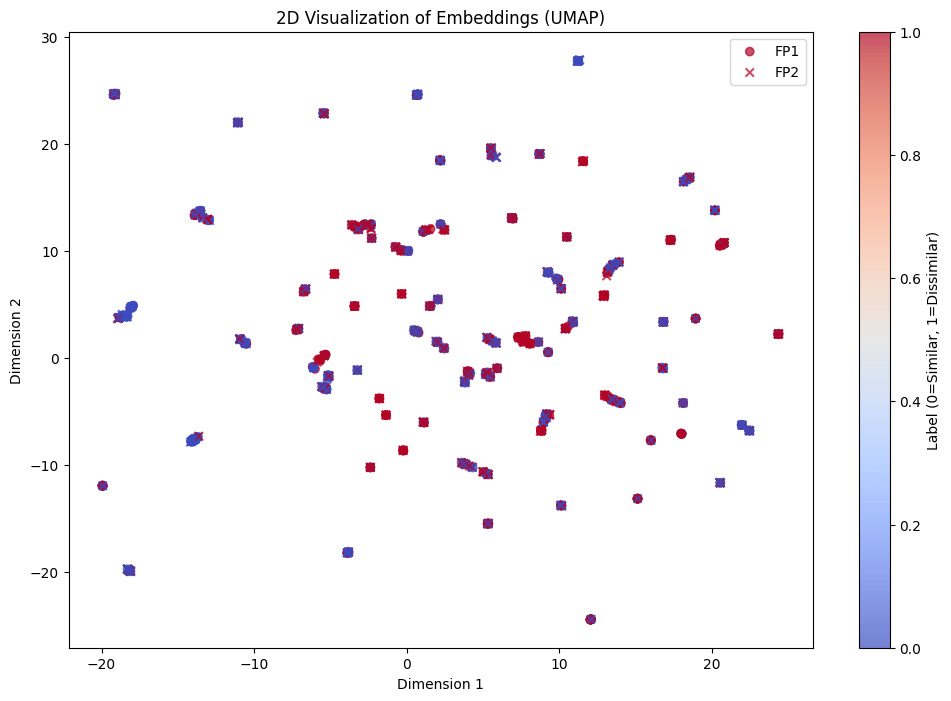

In [67]:
#| fig-label: fig-embed
plot_2D_embeddings(embeddings_fp1, embeddings_fp2, labels, method='UMAP')

In [68]:
#tr_embeddings_fp1, tr_embeddings_fp2, tr_distances, tr_labels, tr_identifiers

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [70]:
X_pairs = []
y_labels = []
for (x,y,label) in zip(tr_embeddings_fp1, tr_embeddings_fp2,tr_labels):
    X_pairs.append(np.concatenate([np.abs(x - y), x * y]))
    y_labels.append(label)
X_pairs = np.array(X_pairs)
y_labels = np.array(y_labels)

In [71]:
clf = LogisticRegression()
clf.fit(X_pairs, y_labels)


LogisticRegression()

In [72]:
X_testpairs = []
y_testlabels = []
for (x,y,label) in zip(embeddings_fp1, embeddings_fp2,labels):
    X_testpairs.append(np.concatenate([np.abs(x - y), x * y]))
    y_testlabels.append(label)
X_testpairs = np.array(X_testpairs)
y_testlabels = np.array(y_testlabels)

In [73]:
y_pred = clf.predict(X_testpairs)

In [74]:
print("Accuracy:", accuracy_score(y_testlabels, y_pred))

Accuracy: 0.9968354430379747


In [75]:
X_testpairs

array([[ 0.00497736,  0.02035127,  0.08996186, ...,  0.00433163,
         0.00036625,  0.00076137],
       [ 0.00085368,  0.00028116,  0.00067303, ...,  0.01165595,
         0.06024383,  0.00785902],
       [ 0.0005247 ,  0.00126376,  0.00447054, ...,  0.00727264,
         0.0005876 ,  0.07216742],
       ...,
       [ 0.11176401,  0.20972125,  0.11339727, ...,  0.0164958 ,
        -0.00099221, -0.00047363],
       [ 0.00381388,  0.01596163,  0.00293434, ...,  0.00279975,
         0.00254041,  0.00912392],
       [ 0.009177  ,  0.18794961,  0.0323543 , ..., -0.00704309,
         0.0031693 ,  0.01239915]], dtype=float32)

In [76]:
def umap_plot(a):
    model = umap.UMAP(random_state=42, n_jobs = 1)
    #model = TSNE(learning_rate = 200, perplexity=a[label].shape[0]-1, random_state = 42)
    umap_features = model.fit_transform(a)
    umap_features = pd.DataFrame(umap_features, columns = ['umap_x', 'umap_y'])
    
    return umap_features

In [77]:
umap_df = umap_plot(X_testpairs)

In [78]:
umap_df = (pd.concat([umap_df, pd.Series(y_testlabels)], axis = 1)
 .rename(columns = {0: 'label'})
)


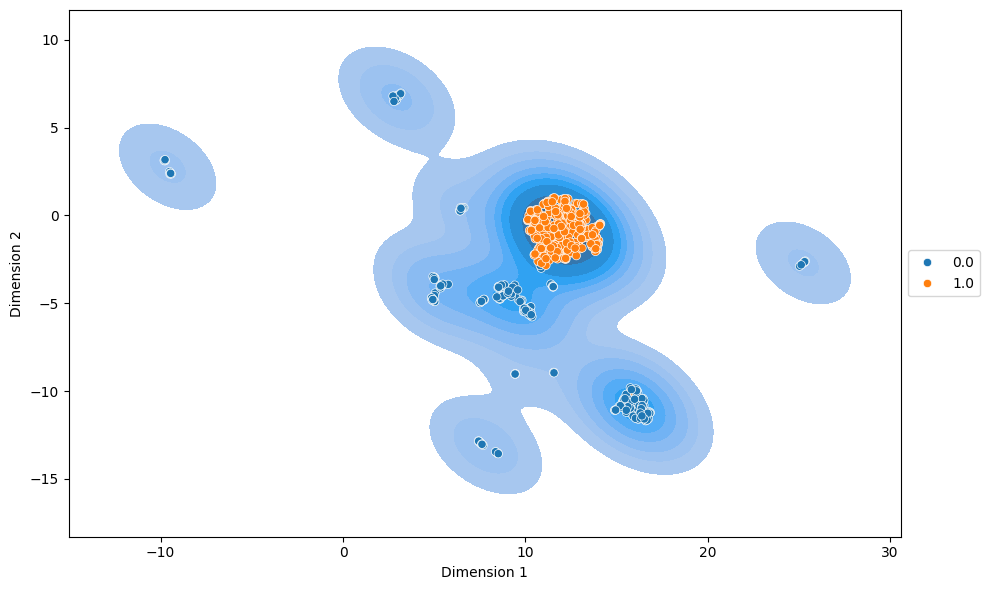

In [79]:
#| fig-label: fig-embed-two
fig, ax = plt.subplots(figsize = (10,6))
color_dict = dict({1: 'red', 0: 'blue'})
sns.kdeplot(x = 'umap_x', y = 'umap_y', fill = True,data = umap_df)
sns.scatterplot(x = 'umap_x', y = 'umap_y' ,   hue = 'label', data = umap_df )
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')

plt.tight_layout()
fig.savefig('fig-embed-two.png')